In [1]:
import compnal
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os
os.environ["OPENBLAS_NUM_THREADS"] = "10"
os.environ["MKL_NUM_THREADS"] = "10"
os.environ["VECLIB_NUM_THREADS"] = "10"
os.environ["OMP_NUM_THREADS"] = "10"
os.environ["NUMEXPR_NUM_THREADS"] = "10"
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [2]:
degree = 3
J = -1.0
x_size = 12
y_size = 12

In [3]:
lattice = compnal.lattice.Square(
    x_size=x_size,
    y_size=y_size,
    boundary_condition=compnal.lattice.BoundaryCondition.PBC
)
model = compnal.model.PolynomialIsing(
    lattice=lattice, interaction={degree: J}
)
solver = compnal.solver.ClassicalMonteCarlo(
    model=model, 
    updater=compnal.solver.Updater.METROPOLIS
)
solver.num_sweeps = 10000
solver.num_samples = 10000
solver.num_threads = 10
T_list = np.arange(1.5, 3.1, 0.1)

In [4]:
f_sum_list = []
for t in tqdm(T_list):
    solver.temperature = t
    solver.run()
    f = np.zeros((model.lattice.x_size, model.lattice.y_size), dtype=np.complex)
    for index in range(solver.num_samples):
        shaped_sample = np.reshape(solver.get_samples()[index], (model.lattice.x_size, model.lattice.y_size))
        f += np.fft.fft2(shaped_sample)
    f = np.abs(f/solver.num_samples)
    f_sum  = f[0][0] + f[0][y_size*1//3] + f[0][y_size*2//3]
    f_sum += f[x_size*1//3][0] + f[x_size*1//3][y_size*1//3] + f[x_size*1//3][y_size*2//3]
    f_sum += f[x_size*2//3][0] + f[x_size*2//3][y_size*1//3] + f[x_size*2//3][y_size*2//3]
    f_sum_list.append(f_sum/9)
    plt.imshow(f, origin="lower")
    plt.title(f"T={t}")
    plt.colorbar()
    plt.show()

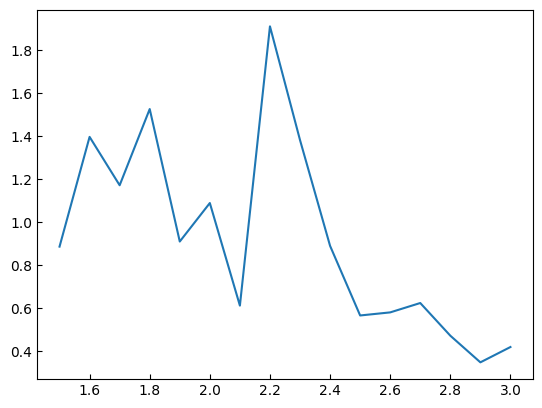

In [ ]:
plt.plot(T_list, f_sum_list)

In [ ]:
import itertools
import numpy as np
import dimod

In [ ]:
J = {}
J[((0,0),(0,1),(0,2))] = -1
J[((1,0),(1,1),(1,2))] = -1
J[((2,0),(2,1),(2,2))] = -1

J[((0,0),(1,0),(2,0))] = -1
J[((0,1),(1,1),(2,1))] = -1
J[((0,2),(1,2),(2,2))] = -1

poly = dimod.BinaryPolynomial(J, dimod.SPIN)

sample_set = dimod.ExactPolySolver().sample_poly(poly)

In [ ]:
print(len(sample_set.lowest().record))
m = 0.0
mm = 0.0
mmmm = 0.0
for s in sample_set.lowest().record:
    spin = sum(s[0]/9)
    m += spin
    mm += spin*spin
    mmmm += spin*spin*spin*spin
    print(sum(s[0])/9)
    #plt.imshow(np.reshape(s[0], (3, 3)), origin="lower")
    #plt.colorbar()
    #plt.show()
m = m/len(sample_set.lowest().record)
mm = mm/len(sample_set.lowest().record)
mmmm = mmmm/len(sample_set.lowest().record)
print(m, mm, mmmm)

16
-0.3333333333333333
-0.3333333333333333
-0.3333333333333333
0.1111111111111111
0.1111111111111111
0.1111111111111111
0.1111111111111111
-0.3333333333333333
-0.3333333333333333
0.1111111111111111
1.0
0.1111111111111111
-0.3333333333333333
0.1111111111111111
0.1111111111111111
0.1111111111111111
3.8163916471489756e-17 0.11111111111111116 0.06721536351165988
